<a href="https://colab.research.google.com/github/alek00sandra/uczenie_maszynowe/blob/main/Projekt_Regularyzacja_wsp%C3%B3%C5%82czynnik%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RANSAC (Random Sample Consensus)

In [2]:

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import  datasets
 
 
class RANSAC1:
    
    def __init__(self, max_iters_k=100, treshold=0.5, min_acceptable_inliers = 100):
        
        self.max_iters_k = max_iters_k
        self.treshold = treshold
        self.min_acceptable_inliers = min_acceptable_inliers
        
        self.best_model = None
        self.best_inlier_count = 0
        self.inlier_mask = None
 
        
    def fit(self, X,y, show_partial_results = False):
 
        assert X.shape[1] == 1, 'The imput matrix should have only one dimension/column'
        assert X.shape[0] > 1.5 * self.min_acceptable_inliers, "The inmut matrix should have more data"
        
        
      
        self.best_model = None
        self.best_inlier_count = 0
        self.inlier_mask = None
 
   
        sample_size = X.shape[1] + 1
        data = np.hstack( (X[:,0].reshape(-1,1), y.reshape(-1,1)) )
          
        for i in range(self.max_iters_k):
            
            
            rand_idx = np.random.choice(len(data), size=sample_size, replace=False)
            points = data[rand_idx,:]
            
           
            a = (points[0,1] - points[1,1]) / (points[0,0] - points[1,0] + 
                sys.float_info.epsilon) 
            b = points[0,1]- a * points[0,0]
                      
            y_pred = a * data[:,0] + b
            
          
            this_inlier_mask = np.square(y_pred - y) < self.treshold
            this_inlier_count = np.sum(this_inlier_mask)
            
           
            better_found = ((this_inlier_count > self.min_acceptable_inliers)
                            and (this_inlier_count > self.best_inlier_count))
            
            if better_found:
                self.best_model = (a,b)
                self.best_inlier_count = this_inlier_count
                self.inlier_mask = this_inlier_mask
 
            if show_partial_results:
                
                line_X = np.arange(X.min(), X.max())[:, np.newaxis]
                line_y = a * line_X + b
 
                plt.scatter(X[this_inlier_mask], y[this_inlier_mask], color='green', 
                            marker='.', label='Inliers')
                plt.scatter(X[~this_inlier_mask], y[~this_inlier_mask], color='red', 
                            marker='.', label='Outliers')
                plt.plot(line_X, line_y, color='blue', linewidth=2, label='RANSAC')
                plt.scatter(points[:,0], points[:,1], color='black', 
                            marker='o', label='Sampled points', s=100)
                plt.legend(loc='lower right')
                plt.xlabel("Input")
                plt.ylabel("Response")
                plt.show()
                

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
 
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv("housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 

In [5]:
X = data.loc[:, 'LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values
 
 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 

In [6]:
ransac = RANSACRegressor(residual_threshold=20)
ransac.fit(X_train, y_train)
r2_ransac = r2_score(y_test, ransac.predict(X_test))
print("Ransac regression result: {}".format(r2_ransac))
 
 
lr = LinearRegression()
lr.fit(X_train, y_train)
r2_lr = r2_score(y_test, lr.predict(X_test))
print("Linear regression result: {}".format(r2_lr))
 

Ransac regression result: 0.5453372904456528
Linear regression result: 0.5478770397135477


In [7]:
the_best_r2 = 0
 
for tmp_treshold in range(10,40):
 
    tmp_ransac = RANSACRegressor(residual_threshold=tmp_treshold)
    tmp_ransac.fit(X_train, y_train)
    tmp_r2 = r2_score(y_test, tmp_ransac.predict(X_test))
    
    print("Treshold {} - R2 {}".format(tmp_treshold, tmp_r2))
    
    if tmp_r2 > the_best_r2:
        the_best_r2 = tmp_r2
        ransac = tmp_ransac
   

Treshold 10 - R2 0.51462349920531
Treshold 11 - R2 0.5137732251474838
Treshold 12 - R2 0.5384640789286145
Treshold 13 - R2 0.5018744344772419
Treshold 14 - R2 0.5063005573594785
Treshold 15 - R2 0.5018744344772419
Treshold 16 - R2 0.5183089032568782
Treshold 17 - R2 0.5018744344772419
Treshold 18 - R2 0.5368247681572103
Treshold 19 - R2 0.524160345166024
Treshold 20 - R2 0.5173741227630682
Treshold 21 - R2 0.5487447301621475
Treshold 22 - R2 0.5018744344772419
Treshold 23 - R2 0.5453372904456528
Treshold 24 - R2 0.5453372904456528
Treshold 25 - R2 0.524160345166024
Treshold 26 - R2 0.5478770397135477
Treshold 27 - R2 0.5453372904456528
Treshold 28 - R2 0.5478770397135477
Treshold 29 - R2 0.5478770397135477
Treshold 30 - R2 0.5478770397135477
Treshold 31 - R2 0.5478770397135477
Treshold 32 - R2 0.5478770397135477
Treshold 33 - R2 0.5478770397135477
Treshold 34 - R2 0.5478770397135477
Treshold 35 - R2 0.5478770397135477
Treshold 36 - R2 0.5473138322395972
Treshold 37 - R2 0.5478770397135

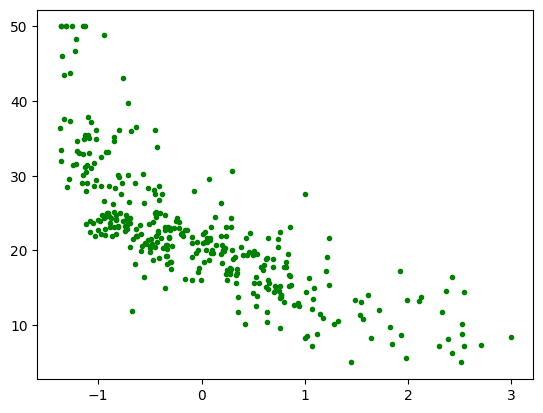

In [11]:
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
line_y_lr = lr.predict(line_X)
 
plt.scatter(X_train[ransac.inlier_mask_], y_train[ransac.inlier_mask_], color='green', marker='.',            label='Inliers')


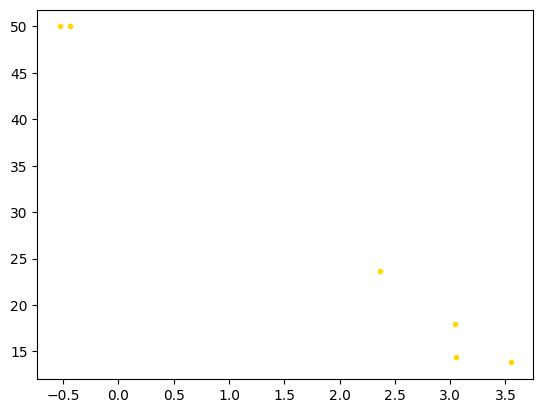

In [12]:
plt.scatter(X_train[~ransac.inlier_mask_], y_train[~ransac.inlier_mask_], color='gold', marker='.',
            label='Outliers')
 

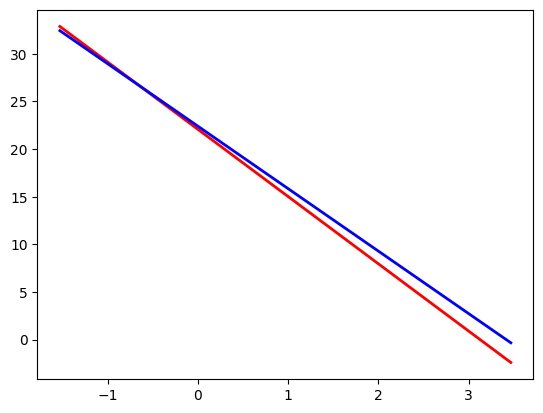

In [13]:
plt.plot(line_X, line_y_ransac, color='red', linewidth=2, label='RANSAC regressor')
plt.plot(line_X, line_y_lr, color='blue', linewidth=2, label='Linear regression')
 

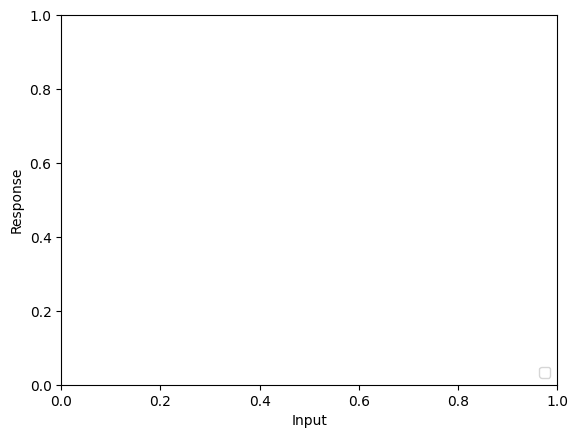

Ransac regression result: 0.5487447301621475
Linear regression result: 0.5478770397135477


In [15]:
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()
 
r2_ransac = r2_score(y_test, ransac.predict(X_test))
print("Ransac regression result: {}".format(r2_ransac))
print("Linear regression result: {}".format(r2_lr))

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
        
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
 
data = pd.read_csv("housing.data",
                   sep=' +', engine='python', header=None, 
                   names=cols)
 

In [17]:
X = data.drop('MEDV', axis=1)
y = data['MEDV'].values
 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
 
 
lasso_df = pd.DataFrame({'param_value': np.arange(start = 0, stop = 10.1, step = 0.1),
                      'r2_result': 0.,
                      'number_of_features':0})
 
for i in range(lasso_df.shape[0]):
    
    alpha = lasso_df.at[i, 'param_value']
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    lasso_df.at[i, 'r2_result'] = r2_score(y_test, model.predict(X_test))
    lasso_df.at[i, 'number_of_features'] = len(model.coef_[ model.coef_ > 0])
 
ridge_df = pd.DataFrame({'param_value': np.arange(start = 0, stop = 10.1, step = 0.1),
                      'r2_result': 0.,
                      'number_of_features':0})
 
for i in range(ridge_df.shape[0]):
    
    alpha = ridge_df.at[i, 'param_value']
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    ridge_df.at[i, 'r2_result'] = r2_score(y_test, model.predict(X_test))
    ridge_df.at[i, 'number_of_features'] = len(model.coef_[ model.coef_ > 0])
 
 
elastic_df = pd.DataFrame({'param_value': np.arange(start = 0, stop = 10.1, step = 0.1),
                      'r2_result': 0.,
                      'number_of_features':0})
 
for i in range(elastic_df.shape[0]):
    
    alpha = elastic_df.at[i, 'param_value']
    model = ElasticNet(alpha=alpha)
    model.fit(X_train, y_train)
    
    elastic_df.at[i, 'r2_result'] = r2_score(y_test, model.predict(X_test))
    elastic_df.at[i, 'number_of_features'] = len(model.coef_[ model.coef_ > 0])
 

<ipython-input-18-af1b565c913d>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.197e+03, tolerance: 3.261e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-18-af1b565c913d>:39: UserWa

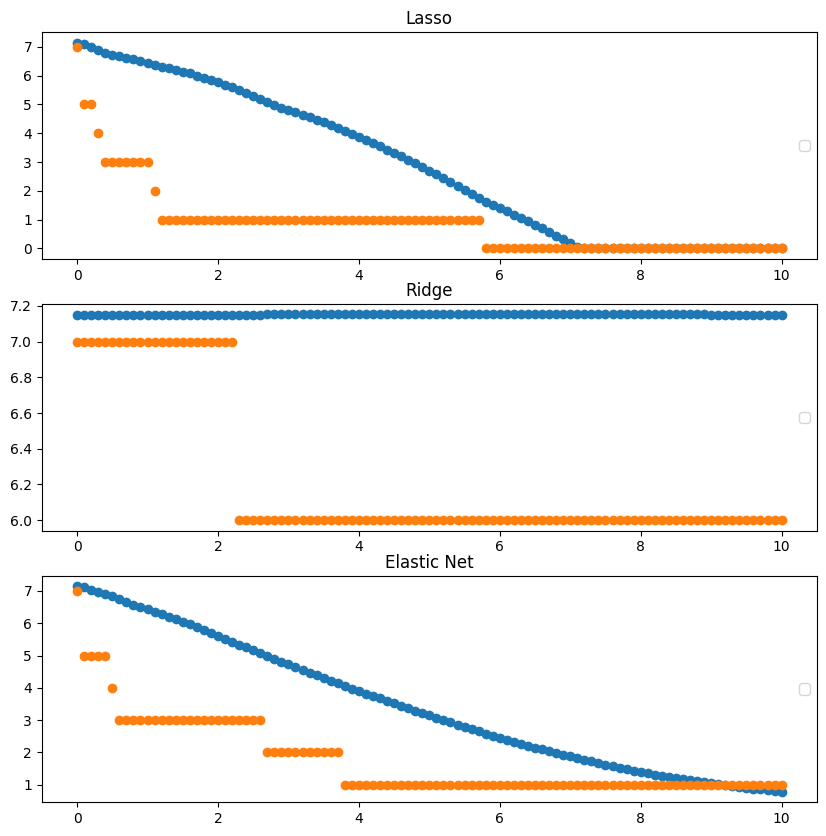

In [19]:
fig, axs = plt.subplots(3, figsize=(10,10))
axs[0].title.set_text('Lasso')
axs[0].scatter(x = lasso_df['param_value'], y=lasso_df['r2_result']*10)
axs[0].scatter(x = lasso_df['param_value'], y=lasso_df['number_of_features'])
axs[0].legend(loc='center right')
axs[1].title.set_text('Ridge')
axs[1].scatter(x = ridge_df['param_value'], y=ridge_df['r2_result']*10)
axs[1].scatter(x = ridge_df['param_value'], y=ridge_df['number_of_features'])
axs[1].legend(loc='center right')
axs[2].title.set_text('Elastic Net')
axs[2].scatter(x = elastic_df['param_value'], y=elastic_df['r2_result']*10)
axs[2].scatter(x = elastic_df['param_value'], y=elastic_df['number_of_features'])
axs[2].legend(loc='center right')
fig.show()
 
 